# Лабораторная работа №8 “Выявление аномалий”

### *Набор данных **ex8data1.mat** представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит две переменные X<sub>1</sub> и X<sub>2</sub> - задержка в мс и пропускная способность в мб/c серверов. Среди серверов необходимо выделить те, характеристики которых аномальные. Набор разделен на обучающую выборку (X), которая не содержит меток классов, а также валидационную (Xval, yval), на которой необходимо оценить качество алгоритма выявления аномалий. В метках классов 0 обозначает отсутствие аномалии, а 1, соответственно, ее наличие.*
### *Набор данных **ex8data2.mat** представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит 11-мерную переменную X - координаты точек, среди которых необходимо выделить аномальные. Набор разделен на обучающую выборку (X), которая не содержит меток классов, а также валидационную (Xval, yval), на которой необходимо оценить качество алгоритма выявления аномалий.*


## **Задание**

### 1. Загрузите данные ex8data1.mat из файла.

In [2]:
from scipy import io
import numpy as np
from scipy.stats import norm, multivariate_normal
from sklearn.metrics import f1_score

import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
ex8data1 = io.loadmat('Data/Lab 8/ex8data1.mat')
X, X_val, y_val = ex8data1['X'], ex8data1['Xval'], ex8data1['yval'].ravel()

### 2. Постройте график загруженных данных в виде диаграммы рассеяния.

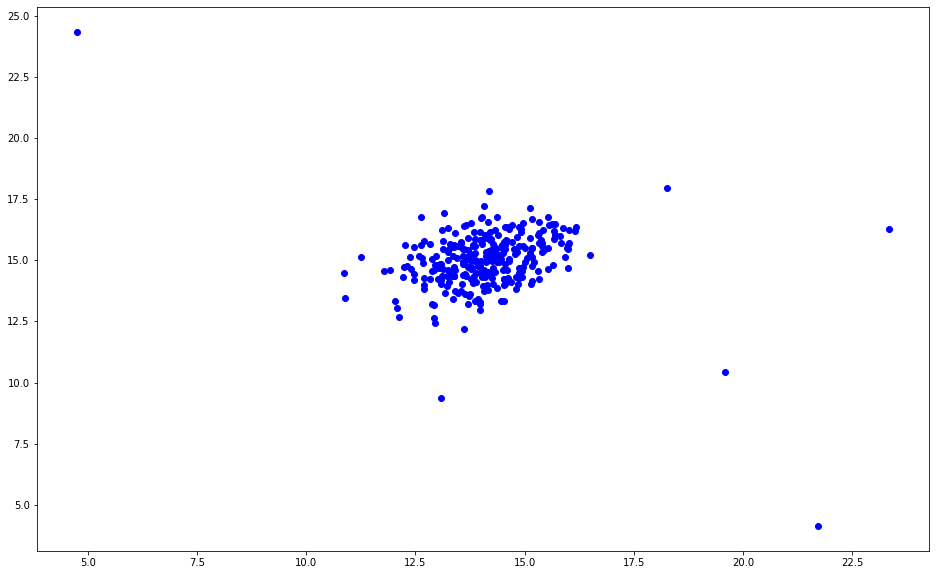

In [4]:
plt.figure(figsize=(16,10))
plt.scatter(X[:,0], X[:,1], color='b')

### 3. Представьте данные в виде двух независимых нормально распределенных случайных величин.

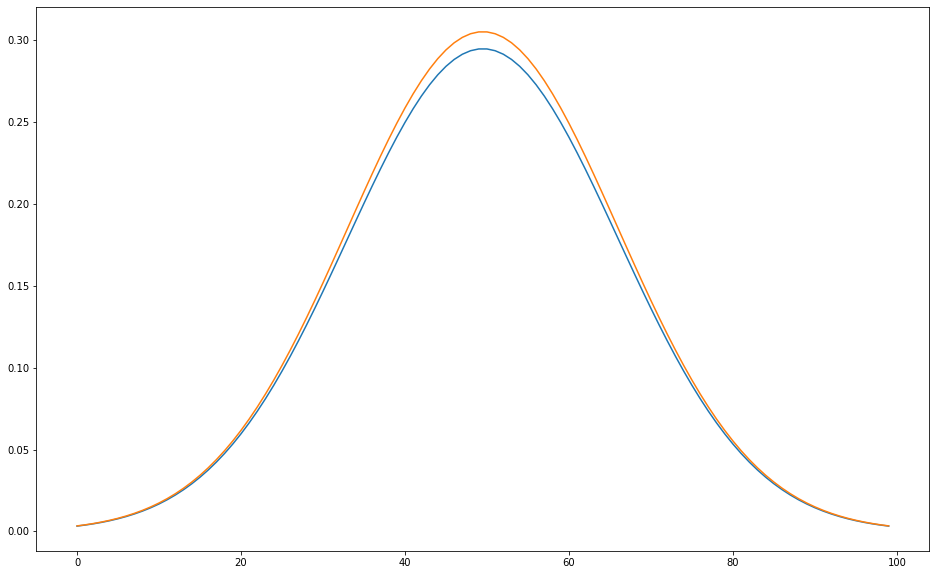

In [11]:
plt.figure(figsize=(16,10))

std1 = np.std(X[:, 0])
mean1 = np.mean(X[:, 0])
plt.plot(norm.pdf(np.linspace(mean1-3*std1, mean1+3*std1, 100), mean1, std1))

std2 = np.std(X[:, 1])
mean2 = np.mean(X[:, 1])
plt.plot(norm.pdf(np.linspace(mean2-3*std2, mean2+3*std2, 100), mean2, std2))

### 4. Оцените параметры распределений случайных величин.

In [12]:
print('X_1: mean = {}, std = {}'.format(mean1, std1))
print('X_2: mean = {}, std = {}'.format(mean2, std2))

X_1: mean = 14.112225783945592, std = 1.353747174879607
X_2: mean = 14.99771050813621, std = 1.3075723042450764


### 5. Постройте график плотности распределения получившейся случайной величины в виде изолиний, совместив его с графиком из пункта 2.

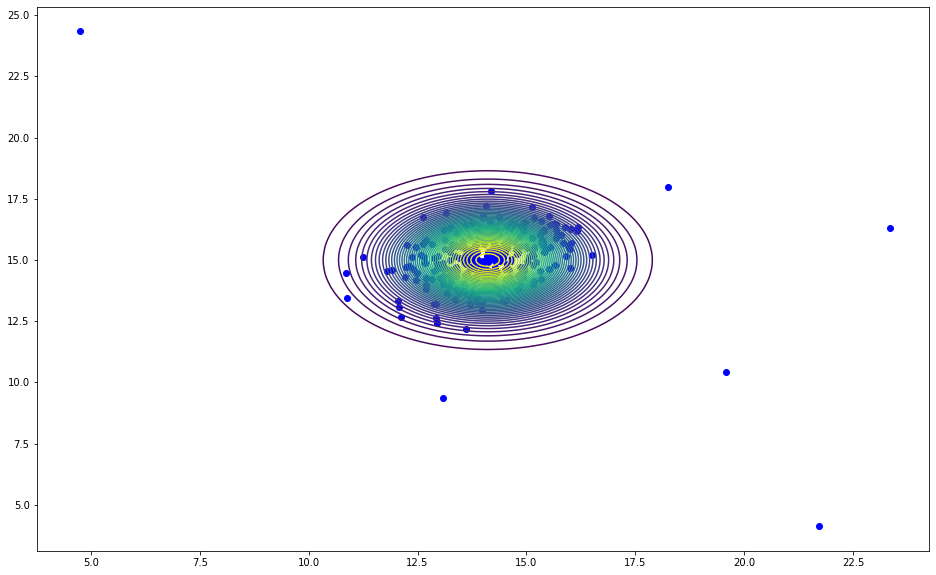

In [28]:
x, y = np.mgrid[np.min(X[:, 0])-1:np.max(X[:, 0])+1:.1, np.min(X[:, 1])-1:np.max(X[:, 1])+1:.1]
pos = np.dstack((x, y))
rv = multivariate_normal([mean1, mean2], [[std1**2, 0.], [0., std2**2]])

plt.figure(figsize=(16,10))

plt.contour(x, y, rv.pdf(pos), levels=np.linspace(0, rv.pdf([mean1, mean2]), 50))
plt.scatter(X[:,0], X[:,1], color='b')

### 6. Подберите значение порога для обнаружения аномалий на основе валидационной выборки. В качестве метрики используйте F1-меру.

In [22]:
max_pdf = rv.pdf([mean1, mean2])
pdf_threshold = np.linspace(0, max_pdf, 100)

f1_scores = []
for thr in pdf_threshold:
    y_pred = (rv.pdf(X_val) < thr).astype(int)
    f1_scores.append(f1_score(y_pred=y_pred, y_true=y_val)) 

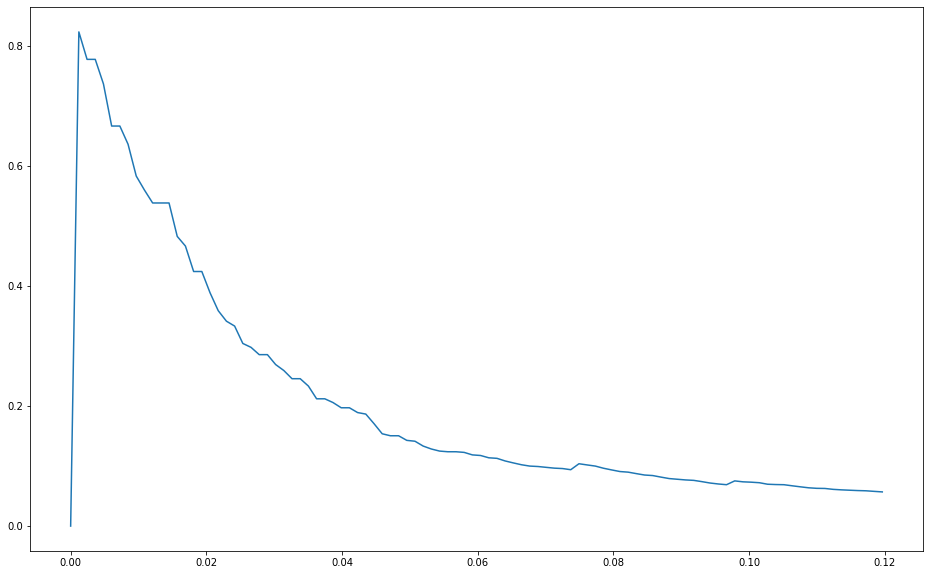

In [25]:
plt.figure(figsize=(16,10))
plt.plot(pdf_threshold, f1_scores)

In [27]:
f1_scores = np.array(f1_scores)
potential_thr = pdf_threshold[f1_scores==f1_scores.max()]
print('Порог: ', potential_thr[0])

Порог:  0.0012083237138973406


### 7. Выделите аномальные наблюдения на графике из пункта 5 с учетом выбранного порогового значения.

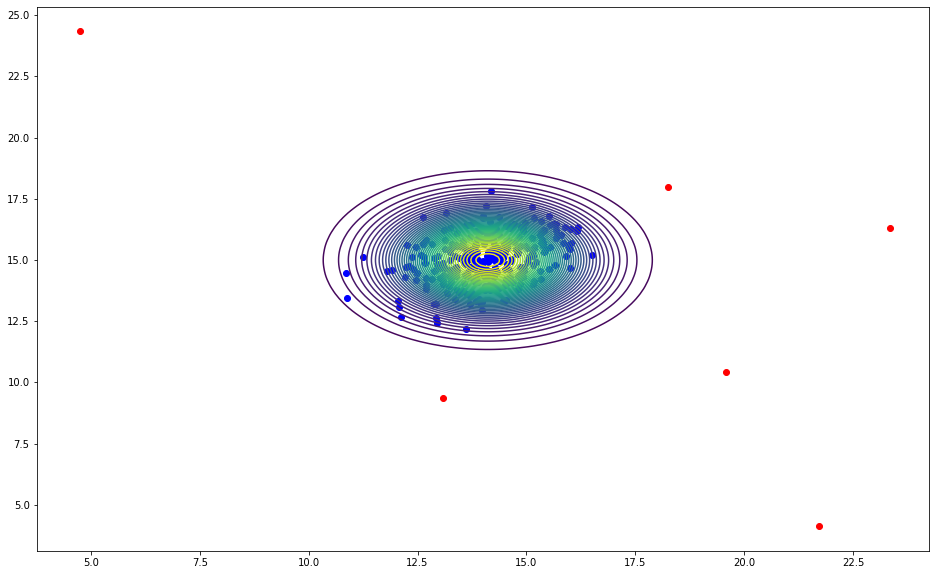

In [29]:
x, y = np.mgrid[np.min(X[:, 0])-1:np.max(X[:, 0])+1:.1, np.min(X[:, 1])-1:np.max(X[:, 1])+1:.1]
pos = np.dstack((x, y))
rv = multivariate_normal([mean1, mean2], [[std1**2, 0.], [0., std2**2]])

plt.figure(figsize=(16,10))

plt.contour(x, y, rv.pdf(pos), levels=np.linspace(0, rv.pdf([mean1, mean2]), 50))

mask_anom = rv.pdf(X) < np.mean(potential_thr)
plt.scatter(X[mask_anom][:, 0], X[mask_anom][:, 1], color='r')
plt.scatter(X[~mask_anom][:, 0], X[~mask_anom][:, 1], color='b')

### 8. Загрузите данные **ex8data2.mat** из файла.

In [30]:
ex8data2 = io.loadmat('Data/Lab 8/ex8data2.mat')
X, X_val, y_val = ex8data2['X'], ex8data2['Xval'], ex8data2['yval'].ravel()

### 9. Представьте данные в виде 11-мерной нормально распределенной случайной величины.

In [34]:
mean_vec = np.mean(X, axis=0)
cov_mtx = np.cov(X.T)

rv = multivariate_normal(mean_vec, cov_mtx)

### 10. Оцените параметры распределения случайной величины.

In [33]:
print('mean: ', mean_vec)
print('covariance matrix: \n', cov_mtx)

mean:  [  4.93940034  -9.63726819  13.81470749 -10.4644888   -7.95622922
  10.19950372  -6.01940755   7.96982896  -6.2531819    2.32451289
   8.47372252]
covariance matrix: 
 [[61.03592966  1.31458257  0.69351115  0.13036383  4.68118732 -0.53251902
  -3.38212462  4.94675776 -1.15529266  3.91638475 -2.9064913 ]
 [ 1.31458257 53.25898085 -2.22688262 -4.61078337  1.7347143   3.08263533
   1.38483374  7.52048692  4.19853428 -4.83028591  7.72236015]
 [ 0.69351115 -2.22688262 58.57403675  2.62632467  3.31168401 -3.39113928
   2.8491179   2.17769853  7.23578898  5.89487564 -2.84942159]
 [ 0.13036383 -4.61078337  2.62632467 84.28832557  1.90719618  1.42835296
   3.76686356  2.57071646 -4.18247236  1.91434134 -1.23235822]
 [ 4.68118732  1.7347143   3.31168401  1.90719618 65.33392569  1.18433798
   5.41494134 -2.52631215  0.74758205  4.01677714 -0.51757842]
 [-0.53251902  3.08263533 -3.39113928  1.42835296  1.18433798 89.66454211
   2.2587495   1.32674552 -0.12059617 -3.43343989  1.27562131]
 [-

### 11. Подберите значение порога для обнаружения аномалий на основе валидационной выборки. В качестве метрики используйте F1-меру.

/home/z_ermak/miniconda3/envs/bsuir_labs/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


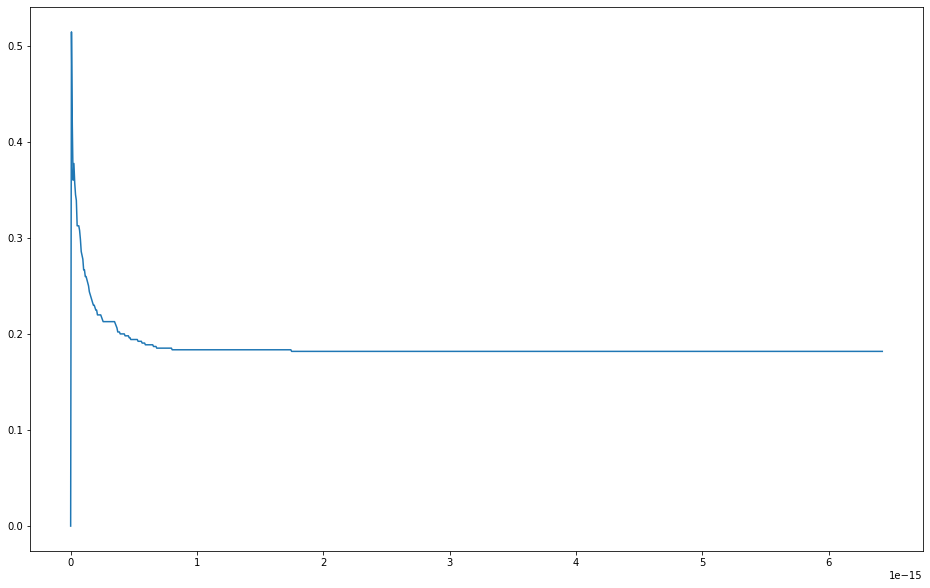

In [35]:
max_pdf = rv.pdf(mean_vec)
pdf_threshold = np.linspace(0, max_pdf, 1000)

f1_scores = []
for thr in pdf_threshold:
    y_pred = (rv.pdf(X_val) < thr).astype(int)
    f1_scores.append(f1_score(y_pred=y_pred, y_true=y_val)) 
    
plt.figure(figsize=(16,10))
plt.plot(pdf_threshold, f1_scores)

In [36]:
f1_scores = np.array(f1_scores)
potential_thr = pdf_threshold[f1_scores==f1_scores.max()]
print('Порог: ', potential_thr[0])

Порог:  6.429606458059658e-18


### 12. Выделите аномальные наблюдения в обучающей выборке. Сколько их было обнаружено? Какой был подобран порог?

In [41]:
y_pred = rv.pdf(X) < np.mean(potential_thr)
print('Обнаружено аномальных наблюдений: {} (порог = {})'.format(y_pred.sum(), potential_thr[0]))

Обнаружено аномальных наблюдений: 247 (порог = 6.429606458059658e-18)
